In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
import os

from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
with open('result.json', encoding="utf8") as json_file:
    data = json.load(json_file)

In [12]:
data['messages']

[{'id': 1,
  'type': 'service',
  'date': '2021-11-11T15:15:50',
  'actor': 'Cantina Royale',
  'actor_id': 'channel1465522941',
  'action': 'migrate_from_group',
  'title': 'Cantina Royale',
  'text': ''},
 {'id': 5,
  'type': 'message',
  'date': '2021-11-11T15:43:50',
  'from': 'Adam Benayoun',
  'from_id': 'user389224410',
  'text': '👀👀👀'},
 {'id': 11,
  'type': 'message',
  'date': '2021-11-11T16:01:20',
  'from': 'Legendary Harry Pottre',
  'from_id': 'user1630446861',
  'file': '(File not included. Change data exporting settings to download.)',
  'thumbnail': '(File not included. Change data exporting settings to download.)',
  'media_type': 'sticker',
  'sticker_emoji': '👀',
  'width': 512,
  'height': 512,
  'text': ''},
 {'id': 16,
  'type': 'message',
  'date': '2021-11-11T16:34:09',
  'from': 'The Owl Keeper',
  'from_id': 'user1247158210',
  'via_bot': '@gif',
  'file': '(File not included. Change data exporting settings to download.)',
  'media_type': 'animation',
  'mime

In [4]:
def get_senders(d):
    """
    Function to get senders in the chat corpus
    """
    senders = []
    for message in d:
        if message.get('from') not in senders:
            senders.append(message.get('from'))
            
    return senders

In [5]:
get_senders(data['messages'])

[None,
 'Adam Benayoun',
 'Legendary Harry Pottre',
 'The Owl Keeper',
 'SAW | TheToadKeeper',
 'Jinwoo',
 'Mr Pig',
 'Merk (Will Never Bonk You First)',
 'Hyrule',
 'Apple J',
 'K S',
 'Aaron Brentwood',
 'Mattis',
 'Cantina Royale',
 'Shamboy',
 'Zomo 主にあって 喜びなさい.',
 'mahfuj0015',
 'Chocpat',
 'Neha Social media manager',
 'SHIN [ NEVER DM FIRST NOR ASK FOR FUNDS ]',
 'Alaz',
 'Nalma ~Will Never PM For Fund$~',
 'Kim',
 'MrWeb',
 'S🔮',
 'Yosef',
 'Simran Robin',
 'Sandro',
 'Mario',
 '©Nugraha | KOM Team',
 'Manu ✖️',
 'ManInBlack',
 'Mike Liu',
 'Kevin',
 'ega_cryptos',
 'varain cayce',
 '链上达人',
 'Sinan',
 '⅞',
 'Rimba | Research Staff',
 '⚡️Gilou⚡️',
 'Shaun',
 'Şeref🔺️',
 'Broad Gasorc',
 'Ata',
 'IlV',
 'ior_io',
 'Ice_T',
 'Sirhot',
 'Udrea',
 'Jack',
 'Marco⚡️',
 'ZELDALAW007',
 'VorteXz⚡',
 'Alin Burada',
 'bogdan nadejde',
 'Bebel',
 "Mr Zixo | Won't DM You First",
 'Cu Ko',
 'Александр',
 'Piatxo',
 'Daniel',
 'Julio',
 'Andreiso',
 'OUA',
 'Ric',
 'Daniel Sagi',
 'Mr Benson

In [6]:
def get_messages(d, friend):
    """
    Returns a list of messages from that friend
    """
    res = []
    for message in d:
        if message.get('from') == friend:
            res.append(message['text'])
    
    for message in res:
        if type(message) != str:
            res.remove(message)
        if not message:
            res.remove(message)
    
    return res

In [8]:
get_messages(data['messages'], 'Rose')

[[{'type': 'link', 'text': 'https://whitepaper.cantinaroyale.io/'}],
 [{'type': 'link', 'text': 'https://whitepaper.cantinaroyale.io/'}],
 [{'type': 'link', 'text': 'https://whitepaper.cantinaroyale.io/'}],
 ['For ',
  {'type': 'bold', 'text': 'collaboration'},
  ', ',
  {'type': 'bold', 'text': 'marketing'},
  ' and ',
  {'type': 'bold', 'text': 'AMA'},
  ' proposal, please fill in this form 👇👇\n\n',
  {'type': 'link', 'text': 'https://forms.gle/7oinQph34Jodxdt8A'},
  ''],
 [{'type': 'link', 'text': 'https://whitepaper.cantinaroyale.io/'}],
 ['Click stake under the NFT from your Verko dashboard, then select the option where you wish to stake (either direct or Public)\n\nSee full details here: ',
  {'type': 'link',
   'text': 'https://whitepaper.cantinaroyale.io/game-economy-and-progression/lending-platform'}],
 ['Public Lending Reward.\nThe way the lending platform works tries to ensure fair system for all NFT staking to be rewarded regardless of how "lucky" they were with who borrowe

In [15]:
def get_message_count_by_month(d):
    """
    Get count of messages by month and year
    """
    res = {}
    
    for message in d:
        if message['type'] == 'message':
            date_str = message['date'][0:10]
            mydate = datetime.strptime(date_str[0:10], "%Y-%m-%d")
            month_year = mydate.strftime("%B") + ' ' + mydate.strftime("%Y")
            
            # print(month_year)
            
            if month_year not in res.keys():
                res[month_year] = 1
            else:
                res[month_year] += 1
        
    return res

In [16]:
month_dict = get_message_count_by_month(data['messages'])
month_dict

{'November 2021': 9,
 'February 2022': 6,
 'March 2022': 9,
 'April 2022': 4,
 'May 2022': 3200,
 'June 2022': 10657,
 'July 2022': 17703,
 'August 2022': 10923,
 'September 2022': 3039,
 'October 2022': 3386,
 'November 2022': 2782}

In [17]:
def plot_month_barchart(d):
    """
    Plot count of messages by month and year
    """
    plt.figure(figsize=(20,10))
    
    obj = d.keys()
    values = d.values()
    y_pos = np.arange(len(obj))
    
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, obj, rotation=90)
    plt.ylabel('Count')
    
    plt.title('Count of Messages by Year')
    plt.show()

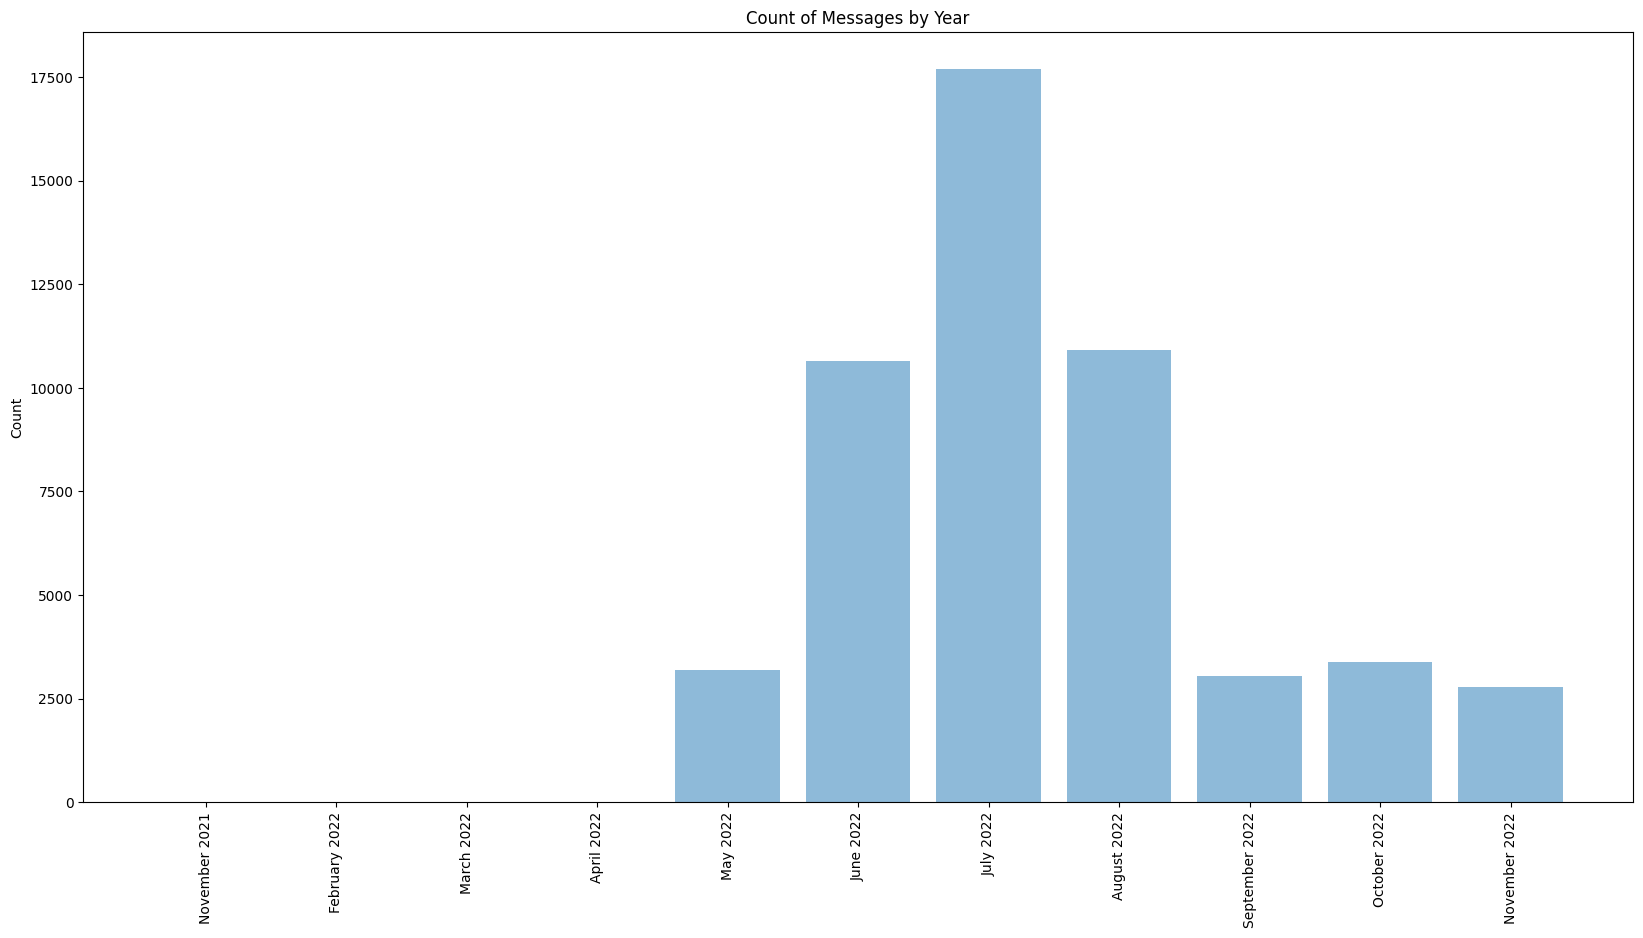

In [18]:
plot_month_barchart(month_dict)

In [19]:
def get_sender_count(d, senders):
    """
    Function to see who sends more messages
    """
    
    res = {i: 0 for i in senders }
    
    for message in d:
        for sender in res.keys():
            if message.get('from') == sender:
                res[sender] += 1
                
    return res

In [20]:
get_sender_count(data['messages'], get_senders(data['messages']))

{None: 655,
 'Adam Benayoun': 1,
 'Legendary Harry Pottre': 3,
 'The Owl Keeper': 1,
 'SAW | TheToadKeeper': 1,
 'Jinwoo': 1,
 'Mr Pig': 2,
 'Merk (Will Never Bonk You First)': 1,
 'Hyrule': 22,
 'Apple J': 2,
 'K S': 1,
 'Aaron Brentwood': 6,
 'Mattis': 2,
 'Cantina Royale': 330,
 'Shamboy': 1,
 'Zomo 主にあって 喜びなさい.': 5678,
 'mahfuj0015': 5,
 'Chocpat': 3398,
 'Neha Social media manager': 2,
 'SHIN [ NEVER DM FIRST NOR ASK FOR FUNDS ]': 2501,
 'Alaz': 116,
 'Nalma ~Will Never PM For Fund$~': 6141,
 'Kim': 38,
 'MrWeb': 6,
 'S🔮': 8,
 'Yosef': 33,
 'Simran Robin': 4,
 'Sandro': 1,
 'Mario': 3,
 '©Nugraha | KOM Team': 2,
 'Manu ✖️': 43,
 'ManInBlack': 15,
 'Mike Liu': 5,
 'Kevin': 2,
 'ega_cryptos': 1,
 'varain cayce': 1,
 '链上达人': 1,
 'Sinan': 2,
 '⅞': 25,
 'Rimba | Research Staff': 4,
 '⚡️Gilou⚡️': 4,
 'Shaun': 3,
 'Şeref🔺️': 1,
 'Broad Gasorc': 10,
 'Ata': 118,
 'IlV': 1,
 'ior_io': 6,
 'Ice_T': 1,
 'Sirhot': 1,
 'Udrea': 1,
 'Jack': 3,
 'Marco⚡️': 7,
 'ZELDALAW007': 2,
 'VorteXz⚡': 269,

In [21]:
def get_message_chunk_distribution(d):
    """
    Function to see if me (or friend) oftens sends in chunks
    """
    res = {}  # result should be a dictionary of dictionaries
    
    for message in d:
        if message.get('from') not in res.keys():
            res[message.get('from')] = {}
            
    for sender in res.keys():  # Iterate over all available senders
        count = 0
        for message in d:  # go through all messages again
            if message.get('from') == sender:
                count += 1  # increment by 1 if it's the same sender
            else:
                if count not in res[sender].keys():
                    res[sender][count] = 1
                else:
                    res[sender][count] += 1
                count = 0  # reset to 0
    
    return res

In [22]:
def remove_chunks(d, val=4):
    """
    Remove chunks from result if they are less than 4
    """
    return dict((key, value) for key, value in d.items() if key >= val)

In [23]:
def get_avg_message_chunk(d):
    total = 0  # store total number of messages
    chunks = 0
    for key in d.keys():
        total += key * d[key]
        chunks += d[key]
        
    return total / chunks

In [24]:
chunk_dict = get_message_chunk_distribution(data['messages'])

In [29]:
nel_dict = dict(sorted(chunk_dict['Vincenzo'].items()))
nel_dict = remove_chunks(nel_dict)
nel_dict  # do I want to plot this??

jk_dict = dict(sorted(chunk_dict['Vincenzo'].items()))
jk_dict = remove_chunks(jk_dict)
jk_dict  # do I want to plot this??

{}

In [30]:
get_avg_message_chunk(nel_dict)

ZeroDivisionError: division by zero

In [31]:
get_avg_message_chunk(jk_dict)

ZeroDivisionError: division by zero

In [32]:
def get_ignored_count_per_month(d, sender, time=4):
    """
    Check how many times my friend (or me) ignores
    Default time to respond is 4 hours
    """
    res = 0  # initialise as 0
    
    started = False
    
    initial_time = 0  # set to avoid local unbound error
    
    for message in d:
        if message.get('from') != sender and started == False:
            started = True
            initial_time = datetime.strptime(message.get('date'), "%Y-%m-%dT%H:%M:%S") # datetime object
        if message.get('from') == sender:
            started = False
            end_time = datetime.strptime(message.get('date'), "%Y-%m-%dT%H:%M:%S")
            
            if initial_time != 0:
                diff = end_time - initial_time
                hours = diff.total_seconds() / (60 * 60)
            
                if hours > 4:
                    res += 1
                
    return res

In [33]:
get_ignored_count_per_month(data['messages'], "Rose")

9

In [34]:
get_ignored_count_per_month(data['messages'], "Rose")

9

In [35]:
def get_avg_response_time(d, sender):
    """
    Get average response time for a person (in hours)
    """
    time = 0
    count = 0
    
    started = False
    initial_time = 0  # set to avoid local unbound error
    
    
    for message in d:
        if message.get('from') != sender and started == False:
            started = True
            initial_time = datetime.strptime(message.get('date'), "%Y-%m-%dT%H:%M:%S") # datetime object
        if message.get('from') == sender:
            started = False
            end_time = datetime.strptime(message.get('date'), "%Y-%m-%dT%H:%M:%S")
            
            if initial_time != 0:
                diff = end_time - initial_time
                hours = diff.total_seconds() / (60 * 60)
                
                time += hours
                count += 1
                
    return time / count

In [38]:
get_avg_response_time(data['messages'], "Rose")

288.49669444444436

In [39]:
get_avg_response_time(data['messages'], "Rose")

288.49669444444436

### Creating text corpus

1. Create corpus for text
2. Remove stopwords

In [43]:
def create_corpus(d, sender='Rose'):
    res = ""
    
    for message in d:
        if message.get('from') == sender:
            if type(message.get('text')) == str:
                res += message.get('text')  # sometimes if I send code it's a list
                res += " "
            
    return res

In [44]:
corpus = create_corpus(data['messages'])
corpus

''

In [281]:
'ah' in stopwords

True

In [45]:
stopwords.append("(")  # added ah, hmm, ok, wah, go, ' ', u, hehe, haha, ',', '?', ''s'
# ':', 'im', 'yea', "n't", "(", 

NameError: name 'stopwords' is not defined

In [304]:
words = nltk.word_tokenize(corpus)
words = [w for w in words if w.lower() not in stopwords]  # remove stopwords

In [305]:
words[:100]

['wheee',
 'finally',
 'done',
 'code',
 'need',
 'append',
 'took',
 '2hr',
 'man',
 'data',
 'cleaning',
 'tho',
 'still',
 'Tableau',
 'think',
 'python',
 'bonus',
 'Need',
 'plot',
 'confidence',
 'interval',
 'right',
 'lol',
 'give',
 'p',
 'value',
 'automatically',
 'meet',
 'show',
 'find',
 'google',
 'latex',
 'jupyter',
 'markdown',
 'subscript',
 'weird',
 'bukit',
 'timah',
 'filter',
 'put',
 'towns',
 'labels',
 'marks',
 'huhhh',
 'need',
 'airport',
 'names',
 'looks',
 'good',
 'lines',
 'curved',
 'may',
 'look',
 'better',
 'say',
 'ahead',
 'compare',
 'anyway',
 'Dh',
 'Come',
 'leg',
 'one',
 'trust',
 'Arnd',
 'center',
 'Later',
 'room',
 'Ayy',
 'left',
 'project',
 'sigh',
 'group',
 'started',
 'report',
 'also',
 'dk',
 'write',
 'T_T',
 'think',
 'look',
 'adjusted',
 'r2',
 'fresh',
 'new',
 'data',
 'Yeah',
 'least',
 'got',
 'bukit',
 'timah',
 'across',
 '8',
 'datasets',
 'combined',
 'different',
 'months',
 'send',
 'google',
 'maps',
 'thingy']

In [46]:
fd = nltk.FreqDist(words)
fd

NameError: name 'words' is not defined

In [307]:
fd.most_common(10)

[('think', 456),
 ('like', 354),
 ('also', 329),
 ('buy', 234),
 ('get', 223),
 ('need', 212),
 ('got', 212),
 ('maybe', 205),
 ('good', 200),
 ('one', 196)]

In [310]:
type(fd.tabulate(15))

think  like  also   buy   get  need   got maybe  good   one   cuz right  sell  time   lol 
  456   354   329   234   223   212   212   205   200   196   196   195   195   181   179 


NoneType

In [236]:
fd["python"]

45

In [311]:
fd["tableau"]

7

In [243]:
fd["shopee"]

45

In [244]:
lower_fd = nltk.FreqDist([w.lower() for w in fd])

In [245]:
lower_fd["shopee"]  # 2 variations for shopee

2

In [248]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(data['messages'][0]['text'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [250]:
sia.polarity_scores(data['messages'][100]['text'])

{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.25}

In [255]:
def get_sentiment_score(d, sender='Nelson'):
    """
    Return compound score using NLTK's default sentiment analyzer
    """
    sia = SentimentIntensityAnalyzer()
    total = 0
    count = 0 
    
    for message in d:
        if message.get('from') == sender and type(message.get('text')) == str:
            total += sia.polarity_scores(message.get('text'))['compound']
            count += 1
    
    return total / count

In [256]:
get_sentiment_score(data['messages'])  # Nelson's sentiment

0.05374437510685562

In [257]:
get_sentiment_score(data['messages'], 'Jun Kai (BIZ)')

0.033988672922251995

In [259]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords[:100]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once']

In [47]:
def get_sentiment_score_extra(d, sender='Nelson'):
    """
    Return compound score using NLTK's default sentiment analyzer
    1. Filter for length
    2. Filter for stopwords
    """
    sia = SentimentIntensityAnalyzer()
    stopwords = nltk.corpus.stopwords.words("english")
    
    total = 0
    count = 0 

    for message in d:
        if message.get('from') == sender and type(message.get('text')) == str:
            text = message.get('text').split()  # default split is whitespace
            text = [w for w in text if w.lower() not in stopwords]  # remove stopwords
            if len(text) >= 6:  # at least 6 words
                text_string = " ".join(text)
                total += sia.polarity_scores(message.get('text'))['compound']
                count += 1
    
    return total / count

In [263]:
get_sentiment_score_extra(data['messages'])

0.1264820149875103

In [264]:
get_sentiment_score_extra(data['messages'], 'Jun Kai (BIZ)')

0.07603193629505428

In [265]:
def get_sentiment_count_extra(d, sender='Nelson'):
    """
    Return count score using NLTK's default sentiment analyzer
    1. Filter for length
    2. Filter for stopwords
    """
    sia = SentimentIntensityAnalyzer()
    stopwords = nltk.corpus.stopwords.words("english")
    
    scores = {
        'positive': 0,
        'negative': 0,
        'neutral': 0
    }
    
    for message in d:
        if message.get('from') == sender and type(message.get('text')) == str:
            text = message.get('text').split()  # default split is whitespace
            text = [w for w in text if w.lower() not in stopwords]  # remove stopwords
            if len(text) >= 6:  # at least 6 words
                text_string = " ".join(text)
                score = sia.polarity_scores(message.get('text'))['compound']
                
                if score > 0:
                    scores['positive'] += 1
                elif score < 0:
                    scores['negative'] += 1
                else:
                    scores['neutral'] += 1
                    
    return scores

In [266]:
get_sentiment_count_extra(data['messages'])

{'positive': 505, 'negative': 207, 'neutral': 489}

In [267]:
get_sentiment_count_extra(data['messages'], 'Jun Kai (BIZ)')

{'positive': 420, 'negative': 252, 'neutral': 521}

In [ ]:
def get_top_10_words(d, sender='Nelson'):
    """
    Return top 10 most commonly used words
    """
    fd = nltk.FreqDist(words)

**TODO:** 

1. filter messages with at least a certain length
2. remove stopwords?
3. try out count vectorizer
4. update stopwords
5. include specific vocab in model
6. do I really want a wordcloud

### Create friend report

In [ ]:
def get_friend_report()